<a href="https://colab.research.google.com/github/ricardorq85/genetic-forex/blob/master/tree0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión

En este cuaderno vamos a implementar árboles de decisión para un problema de clasificación binaria.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons

In [0]:
plt.rc('font', family='serif')
%matplotlib inline

In [0]:
def plot_decision_regions(X, y, classifier=None, resolution=0.02):
    """ Taken from Rashka's book """
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    x2_min, x2_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    if classifier is not None:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black'
        )

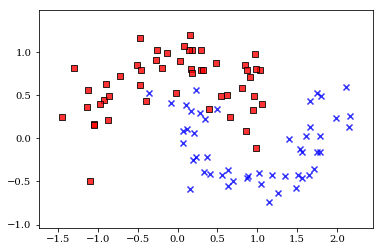

In [0]:
X, y = make_moons(noise=0.2)
plot_decision_regions(X, y)

Primero vamos a definir una clase llamada Dataset, la cual contiene un atributo `features` y un atributo `labels`.

In [0]:
class Dataset:
    def __init__(self, features, labels):
        
        #The following assertion should be uncomented,
        #but it is easier to verify your without it.
        #assert features.shape[0] == labels.shape[0]
        
        self.features = features
        self.labels = labels
        self.length = labels.shape[0]
        
#    def __getitem__(self, i):
#        features = self.features[i,:]
#        labels = self.labels[i]
#        return type(self)(features, labels)
        
    def __repr__(self):
        msg = "Dataset my dataset of {} observations and {} predictor variables"
        return msg.format(self.length, self.features.shape[1])

In [0]:
labels = np.array([0,0,1,1,1,2,1])

In [0]:
(labels == 0).sum()

2

## Componentes de un árbol de decisión
**Ejercicio 1:** calcular la proporción de elementos de un conjunto de datos que pertenece a una clase en particular.

In [0]:
def _proportion(c, ds):
    """ compute the proportion of data points of class c in dataset ds. """
    # your code starts here
    num = (ds.labels == c).sum()
    den = ds.length
    prop = num/den
    # your code ends here
    return prop

Si todo funciona, el resultado de la siguiente celda debe ser 0.25

In [0]:
ds = Dataset(features=None, labels=np.array([0, 0, 1, 0]))
print("Proportion of class {} is {}".format(1, _proportion(1, ds)))

**Ejercicio 2:** crear una función que compute el indice gini de un conjunto de datos

In [0]:
def _gini_index(ds):
    """ Computes the gini index of ds """
    # your code starts here
    
    # your code ends here
    return gini

Si lo hiciste bien, lo siguiente debe resultar en 0.375

In [0]:
ds = Dataset(features=None, labels=np.array([0, 0, 1, 0]))
print("The Gini index of the data set is {}".format(_gini_index(ds)))

**Ejercicio 3:** implementar una función que calcule la entropía en un conjunto de datos.

In [0]:
def _entropy(ds):
    """ Computes the entropy of a data set"""
    # here starts your code
    
    props = 
    # here ends your code
    return entropy

Lo siguiente debe dar 0.81

In [0]:
ds = Dataset(features=None, labels=np.array([0, 0, 1, 0]))
print("The Entropy of the data set is {:.2f}".format(_entropy(ds)))

**Ejercicio 4:** implementar la función para calcular la ganancia de información

In [0]:
def _info_gain(ds, ds_left, ds_right, impurity_fn):
    """Compute the information gain of a split."""
    # here starts your code
    
    info_gain = 
    # here ends your code
    return info_gain

Lo siguiente debe dar 0.12 y 0.19

In [0]:
ds = Dataset(features=None, labels=np.array([0, 0, 0, 0, 1, 1, 1, 1]))
ds_left = Dataset(features=None, labels=np.array([0, 0, 0, 1]))
ds_right = Dataset(features=None, labels=np.array([0, 1, 1, 1]))

msg = "The information gain of the split using gini index is {:.2f}"
print(msg.format(_info_gain(ds, ds_left, ds_right, _gini_index)))

msg = "The information gain of the split using entropy is {:.2f}"
print(msg.format(_info_gain(ds, ds_left, ds_right, _entropy)))

**Ejercicio 5:** implemente la función que parte un conjunto de datos en 2

In [0]:
def _split_ds(ds, idx, value):
    """ Create left and right splits of ds based on idx and value"""
    #here starts your code
    
    
    # here ends your code
    return ds_left, ds_right

We are expecting the following result: 


```
Left...features: [[1.9 1.3]
 [2.7 1.1]]. labels [0 0].
Right...features: [[9.5 3.6]
 [7.2 3.1]
 [7.4 0.3]]. labels [1 1 1].
```

In [0]:
X_ = np.array([[1.9,1.3],
	           [2.7,1.1],
               [9.5,3.6],
               [7.2,3.1],
               [7.4,0.3]])
y_ = np.array([0,0,1,1,1])
ds = Dataset(X_, y_)
ds_left, ds_right = _split_ds(ds, 0, 5)

msg = "Left...features: {}. labels {}."
print(msg.format(ds_left.features, ds_left.labels))

msg = "Right...features: {}. labels {}."
print(msg.format(ds_right.features, ds_right.labels))

**Ejercicio 6:** implementa una función que encuentre el mejor punto (índice y valor) para dividir un conjunto de datos. El resultado de esta función debe ser un diccionario que contenga los campos `idx, value, ds_left, ds_right`. La implementación está casi lista, solo debes reemplazar cosas que hacen que no funcione.

In [0]:
def _best_split(ds, impurity_fn):
    """ find the best split of a dataset using the given impurity_fn"""
    #set best value to the lowest possible
    best = 
    
    indices = ds.features.shape[1]
    
    for idx in range(indices):
        for _ in _:
            ds_left, ds_right = ####
            temp = #####
            if ####:
                best = temp
                result = {
                    'idx': idx, 
                    'value': value,
                    'ds_left': ds_left,
                    'ds_right': ds_right
                }
    return result

El mejor punto debe ser en el índice 0 y con el valor 3.6

In [0]:
X_ = np.array([[1.9,1.3],
	           [2.7,1.1],
               [3.3,2.1],
               [3.6,2.9],
               [0.8,2.4],
               [9.5,3.6],
               [7.2,3.1],
               [7.4,4.3],
               [10.1,3.5],
               [6.2,3.7]])
y_ = np.array([0,0,0,0,0,1,1,1,1,1])
ds = Dataset(X_, y_)
result = _best_split(ds, _gini_index)
msg = "The best split ocurs at index {} and value {}"
print(msg.format(result['idx'], result['value']))

## Árbol de decisión en una clase
Ya tenemos casi todo lo necesario para implementar una clase que se encargue de todo. Una de las ventajas de poner todo en una clase, es que esta se puede reutilizar más fácilmente; esto puede implicar que le podemos poner una interfaz a nuestro modelo que se adapte bien a como todo funciona dentro de la empresa. 

Falta muy poco para terminar de implementar nuestro árbol de decisión para clasificación. Lo que falta no será ejercicio sino que se dará como ejemplo.


In [0]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=5, criterion='gini'):
        self._root = None
        self.max_depth = max_depth
        if criterion == 'gini':
            self._impurity_fn = lambda x: _gini_index(x)
        else:
            self._impurity_fn = lambda x: _entropy(x)
               
    
    def _best_split(self, ds):
        return _best_split(ds, self._impurity_fn)
    
    def _define_class(self, labels):
        return np.bincount(labels).argmax()
    
    def _recursive_split(self, node, depth):
        
        ds_left, ds_right = node['ds_left'], node['ds_right']
        del node['ds_left']; del node['ds_right']
        
        if ds_left.length == 0 or ds_right.length == 0:
            all_labels = np.concatenate((ds_left.labels, ds_right.labels))
            val = self._define_class(all_labels)
            node['left'] = node['right'] = val
            return
            
        if depth >= self.max_depth:
            node['left'] = self._define_class(ds_left.labels)
            node['right'] = self._define_class(ds_right.labels)
            return 
           
        if  ds_left.length == 1:
            node['left'] = self._define_class(ds_left.labels)
        else:
            node['left'] = self._best_split(ds_left)
            self._recursive_split(node['left'], depth + 1)
            
        if ds_right.length == 1:
            node['right'] = self._define_class(ds_right.labels)
        else:
            node['right'] = self._best_split(ds_right)
            self._recursive_split(node['right'], depth + 1)
      
    def fit(self, X, y):
        self._root = self._best_split(Dataset(X, y))
        self._recursive_split(self._root, 1)
        
    def _recursive_travel(self, node, x):
        idx = node['idx']
        value = node['value']
        if x[idx] <= value:
            if isinstance(node['left'], dict):
                return self._recursive_travel(node['left'], x)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self._recursive_travel(node['right'], x)
            else:
                return node['right']
    
    def predict(self, X):
        if self._root is not None:
            iterable = (self._recursive_travel(self._root, xi) for xi in X)
            return np.fromiter(iterable, int, X.shape[0])
        else:
            raise RuntimeError("please train me first")

In [0]:
mytree = DecisionTreeClassifier(max_depth=5, criterion='entropy')
mytree.fit(X, y)

In [0]:
np.mean(mytree.predict(X) == y)

In [0]:
plot_decision_regions(X, y, classifier=mytree)